CONSIGNAS:
Deberás entregar el avance de tu proyecto final. Crearás un notebook que deberá tener en primera instancia un abstract (250/500 palabras) de acuerdo al dataset elegido del desafío “Visualizaciones en Python”. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. Finalmente, deberás generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.
1.	Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
2.	Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
3.	Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
4.	Identificar valores perdidos.

ABSTRACT(250/500 palabras)

El presente trabajo tiene como objetivo realizar un análisis de datos recolectados a partir de 2018 hasta el 2022, en estaciones de servicio ubicadas en Argentina; para ello se cuenta con un set de datos obtenidos de la Secretaría de Energía desde la página oficial https://datos.gob.ar/dataset. Dichos datos se centran en variables claves como precios, volúmenes de ventas, tipo de combustible, geolocalización y características específicas de las empresas que surten a las estaciones de servicio.
Este proyecto permitirá comprender mejor las complejidades del mercado de combustibles, proporcionando información valiosa para la optimización de operaciones, toma de decisiones y una comprensión más profunda de los factores que afectan los precios y volúmenes de venta en estaciones de servicio específicas de diferentes regiones de Argentina.
Esto se logrará a través de un enfoque descriptivo que utiliza estadísticas y visualizaciones, un enfoque diagnóstico que busca identificar factores influyentes y patrones regionales.
Una futura combinación de este análisis con un enfoque predictivo (modelos para prever tendencias futuras), y un enfoque prescriptivo (proponer recomendaciones y estrategias para optimizar precios y volúmenes de ventas), proporcionará una visión completa y accionable del mercado de combustibles en Argentina.



HIPÓTESIS

Se postula que existe una relación proporcional entre los precios de los combustibles, la geolocalización de las estaciones de servicio y los volúmenes de ventas. A través de un análisis detallado, se busca confirmar o refutar esta hipótesis, identificando factores clave que influyen en la dinámica del mercado de combustibles en Argentina.

In [115]:
#Importar las librerias
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #sobreescribe los parámetros internos de matplotlib para que utilice el estilo de Seaborn.
          #Los gráficos posteriores que realice tendrán un mejor aspecto.
#Carga de tablas
df_EstacionServicio = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/EstacionServicio.csv', encoding='latin1', delimiter=';')
#df_ = pd.read_csv('/content/drive/MyDrive/Tablas recuperatorio primer parcial-20240524/orders')
df_Combustible = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Combustible.csv', encoding='latin1', delimiter=';')
df_Ubicacion = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Ubicacion.csv', encoding='latin1', delimiter=';')
df_Abastecimiento = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Abastecimiento.csv', encoding='latin1', delimiter=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EXPLORACIÓN DE LAS TABLAS:

In [ ]:
df_EstacionServicio #Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_EstacionServicio.shape
#df_EstacionServicio.describe().round(2)
#df_EstacionServicio.info()


,NroInscrip (PK),Nro_Inscripcion,Operador,Bandera,Id_direccion (FK)
0,104_1,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,1_AV. 25 DE MAYO 280
1,104_2,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,2_AV. 25 DE MAYO 280
2,104_3,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,3_AV. 25 DE MAYO 280
3,104_4,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,4_AV. 25 DE MAYO 280
4,107_5,107,MACHAGAI COMBUSTIBLES SRL,YPF,5_M.MORENO Y 25 DE MAYO
...,...,...,...,...,...
813895,10348_813896,10348,FRAN SA,SHELL C.A.P.S.A.,813896_AV GUTNISKY 3396
813896,10490_813897,10490,ENERGY COMBUSTIBLES S.R.L.,SHELL C.A.P.S.A.,813897_BV. COLON 2290
813897,10490_813898,10490,ENERGY COMBUSTIBLES S.R.L.,SHELL C.A.P.S.A.,813898_BV. COLON 2290
813898,10490_813899,10490,ENERGY COMBUSTIBLES S.R.L.,SHELL C.A.P.S.A.,813899_BV. COLON 2290


La tabla EstacionServicio, tiene 813900 entradas o registros y 5 features o variables.

In [ ]:
df_Combustible #Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_Combustible.shape
#df_Combustible.describe().round(2)
#df_Combustible.info()

,CombustibleID (PK),Combustible_Tipo,Producto,Unnamed: 3,
0,1_1,1,Gas Oil Grado 2,NaN,NaN
1,2_2,2,Nafta (premium) de más de 95 Ron,NaN,NaN
2,3_3,3,Nafta (súper) entre 92 y 95 Ron,NaN,NaN
3,4_4,4,Gas Oil Grado 3,NaN,NaN
4,5_3,3,Nafta (súper) entre 92 y 95 Ron,NaN,NaN
...,...,...,...,...,...
813895,813896_1,1,Gas Oil Grado 2,NaN,NaN
813896,813897_1,1,Gas Oil Grado 2,NaN,NaN
813897,813898_3,3,Nafta (súper) entre 92 y 95 Ron,NaN,NaN
813898,813899_2,2,Nafta (premium) de más de 95 Ron,NaN,NaN


In [ ]:
df_Ubicacion#Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_Ubicacion.shape
#df_Ubicacion.describe().round(2)
#df_Ubicacion.info()

,Id_direccion (PK),Direccion,Localidad,Provincia,Latitud,Longitud
0,1_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
1,2_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
2,3_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
3,4_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
4,5_M.MORENO Y 25 DE MAYO,M.MORENO Y 25 DE MAYO,MACHAGAY,CHACO,-269247,"-6004693,00"
...,...,...,...,...,...,...
813895,813896_AV GUTNISKY 3396,AV GUTNISKY 3396,FORMOSA,FORMOSA,-2619418,"-5820045,00"
813896,813897_BV. COLON 2290,BV. COLON 2290,CASILDA,SANTA FE,-330549044,"-611608868,00"
813897,813898_BV. COLON 2290,BV. COLON 2290,CASILDA,SANTA FE,-330549044,"-611608868,00"
813898,813899_BV. COLON 2290,BV. COLON 2290,CASILDA,SANTA FE,-330549044,"-611608868,00"


In [ ]:
df_Abastecimiento#Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_Ubicacion.shape
#df_Ubicacion.describe().round(2)
#df_Ubicacion.info()

,NroInscrip_IdCombust (PK),NroInscrip (FK),CombustibleID (FK),Anio,Mes,Volumen,Precio,Fecha
0,104_1/1_1,104_1,1_1,2018,1,31762.00,230998.0,2018/1
1,104_2/2_2,104_2,2_2,2018,1,130145.00,305659.0,2018/1
2,104_3/3_3,104_3,3_3,2018,1,193071.00,183275.0,2018/1
3,104_4/4_4,104_4,4_4,2018,1,65499.00,27052.0,2018/1
4,107_5/5_3,107_5,5_3,2018,1,277.03,265309.0,2018/1
...,...,...,...,...,...,...,...,...
813895,10348_813896/813896_1,10348_813896,813896_1,2022,6,76.08,143313.0,2022/6
813896,10490_813897/813897_1,10490_813897,813897_1,2022,6,17.03,162372.0,2022/6
813897,10490_813898/813898_3,10490_813898,813898_3,2022,6,10.23,134.9,2022/6
813898,10490_813899/813899_2,10490_813899,813899_2,2022,6,3.91,163.4,2022/6


LIMPIEZA DE LOS DATOS

In [116]:
#Eliminar columnas finales de la tabla "Combustible", que están sin datos
#df_Combustible_clean = df_Combustible.loc[:, ~df_Combustible.columns.str.contains('^Unnamed')]
df_Combustible = df_Combustible.drop(columns=df_Combustible.columns[-2:])
print(df_Combustible.head())
print(df_Combustible.shape)

  CombustibleID (PK)  Combustible_Tipo                          Producto
0                1_1                 1                   Gas Oil Grado 2
1                2_2                 2  Nafta (premium) de más de 95 Ron
2                3_3                 3   Nafta (súper) entre 92 y 95 Ron
3                4_4                 4                   Gas Oil Grado 3
4                5_3                 3   Nafta (súper) entre 92 y 95 Ron
(813900, 3)


In [117]:
#Transformar datos de string a tipo fecha, en la columna"Fecha" de la Tabla "Abastecimiento"
df_Abastecimiento['Fecha'] = pd.to_datetime(df_Abastecimiento['Fecha'], format='%Y/%m')

# Verificar la estructura de df_Abastecimiento después de la conversión
df_Abastecimiento.head()
#print(df_Abastecimiento.dtypes)

,NroInscrip_IdCombust (PK),NroInscrip (FK),CombustibleID (FK),Anio,Mes,Volumen,Precio,Fecha
0,104_1/1_1,104_1,1_1,2018,1,31762.00,230998.0,2018-01-01
1,104_2/2_2,104_2,2_2,2018,1,130145.00,305659.0,2018-01-01
2,104_3/3_3,104_3,3_3,2018,1,193071.00,183275.0,2018-01-01
3,104_4/4_4,104_4,4_4,2018,1,65499.00,27052.0,2018-01-01
4,107_5/5_3,107_5,5_3,2018,1,277.03,265309.0,2018-01-01


In [126]:
# Renombrar columnas que contienen '(FK)' y '(PK)'en su nombre

df_Combustible = df_Combustible.rename(columns={'CombustibleID (PK)': 'CombustibleID'})

df_Abastecimiento = df_Abastecimiento.rename(columns={'NroInscrip_IdCombust (PK)':'NroInscrip_IdCombust',	'NroInscrip (FK)': 'NroInscrip', 'CombustibleID (FK)': 'CombustibleID'})

df_EstacionServicio = df_EstacionServicio.rename(columns={'NroInscrip (PK)': 'NroInscrip', 'Id_direccion (FK)': 'Id_direccion'})

df_Ubicacion = df_Ubicacion.rename(columns={'Id_direccion (PK)': 'Id_direccion'})

df_Combustible

,CombustibleID,Combustible_Tipo,Producto
0,1_1,1,Gas Oil Grado 2
1,2_2,2,Nafta (premium) de más de 95 Ron
2,3_3,3,Nafta (súper) entre 92 y 95 Ron
3,4_4,4,Gas Oil Grado 3
4,5_3,3,Nafta (súper) entre 92 y 95 Ron
...,...,...,...
813895,813896_1,1,Gas Oil Grado 2
813896,813897_1,1,Gas Oil Grado 2
813897,813898_3,3,Nafta (súper) entre 92 y 95 Ron
813898,813899_2,2,Nafta (premium) de más de 95 Ron


REDUCCIÓN DEL TIEMPO DE EJECUCIÓN

Cada tabla tiene 813.900 regisros. Se hace necario reducir la cantidad de datos, para la visualizacion del codigo y acelerar la ejecución del código, para ello se realiza un muestreo estadísticamente representativo. Una manera de hacerlo es usando la función sample de pandas para tomar una muestra aleatoria de los datos.


In [119]:
# Configurar la semilla para reproducibilidad
seed = 42

# Definir el porcentaje de muestreo (0.1% de los datos originales)
sampling_fraction = 0.001

# Reducir la cantidad de datos en cada DataFrame

# Tomar una muestra del 0.1% de cada DataFrame
df_EstacionServicio_sample = df_EstacionServicio.sample(frac=sampling_fraction, random_state=seed)
df_Combustible_sample = df_Combustible.sample(frac=sampling_fraction, random_state=seed)
df_Ubicacion_sample = df_Ubicacion.sample(frac=sampling_fraction, random_state=seed)
df_Abastecimiento_sample = df_Abastecimiento.sample(frac=sampling_fraction, random_state=seed)

# Verificar la cantidad de registros en cada muestra
print("df_EstacionServicio_sample:", len(df_EstacionServicio_sample))
print("df_Combustible_sample:", len(df_Combustible_sample))
print("df_Ubicacion_sample:", len(df_Ubicacion_sample))
print("df_Abastecimiento_sample:", len(df_Abastecimiento_sample))


#¿Por qué se usa una semilla?
# """El 42 en este contexto es un valor numérico que se utiliza como "semilla" para un generador de números aleatorios.
# Los generadores de números aleatorios (RNG) en realidad no producen números completamente aleatorios. En su lugar, utilizan algoritmos para generar secuencias de números que parecen aleatorios. La semilla es un valor inicial que "inicia" el algoritmo.

# ¿Qué hace el 42?
# Cuando estableces la semilla en 42, le dices al generador de números aleatorios que comience su secuencia usando ese valor específico. Esto significa que cada vez que ejecutes el código con la semilla 42, el generador generará la misma secuencia de números "aleatorios".

# ¿Por qué es importante?
# Esto es útil para la reproducibilidad. Si estás trabajando en un proyecto que involucra generación de números aleatorios, es importante poder obtener los mismos resultados cada vez que ejecutas el código. Esto te ayuda a depurar tu código, reproducir resultados para análisis y compartir tu trabajo con otros.

# En resumen: El 42, o el número escogido, es simplemente un número que se utiliza para configurar el generador de números aleatorios y asegurar la reproducibilidad de los resultados.
# Se puede elegir cualquier número, pero 42 es un valor comúnmente usado por convención."""

df_EstacionServicio_sample: 814
df_Combustible_sample: 814
df_Ubicacion_sample: 814
df_Abastecimiento_sample: 814


* Medir la variación mensual de precios, establecer correlaciones significativas entre precios y volúmenes de venta según la estación de servicio y la marca de combustible, y visualizar geoespacialmente la distribución de estaciones de servicio en relación con sus características y desempeño económico.



1. Variación mensual de precios

Primero, vamos a crear un gráfico de líneas para visualizar la variación mensual de precios desde 2018 hasta 2022.

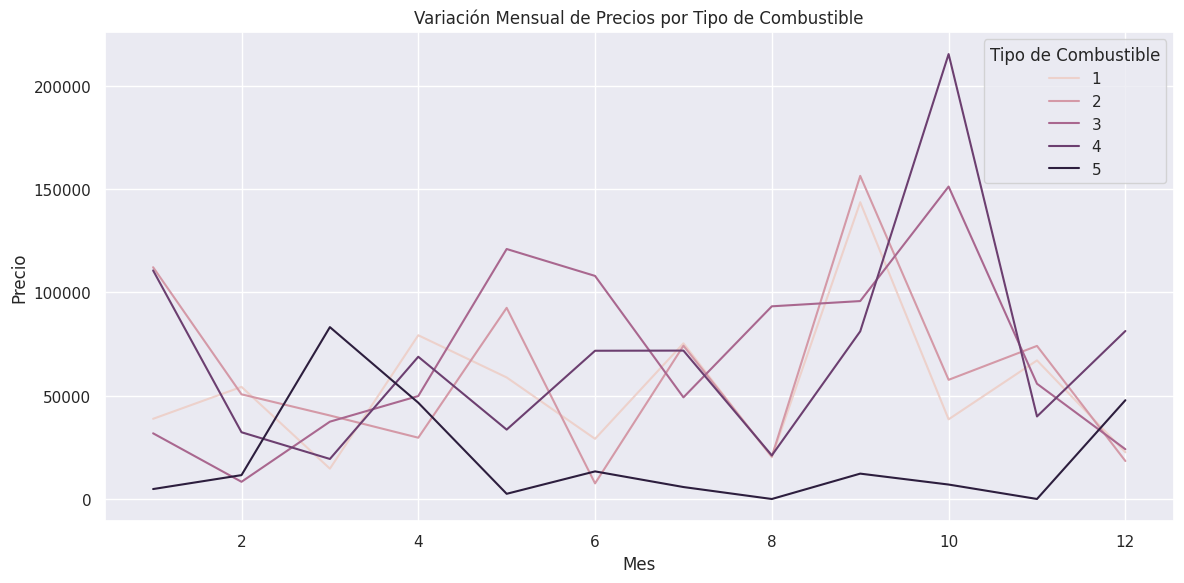

In [120]:
# Unir la tabla de abastecimiento con la tabla de combustible utilizando la columna 'CombustibleID'
df_merged = df_Abastecimiento_sample.merge(df_Combustible_sample, on='CombustibleID', how='left')

# Verificar las primeras filas del DataFrame resultante para asegurarse de que la unión se haya realizado correctamente
df_merged.head()

# Extraer el mes y el año de la columna 'Fecha'
df_merged['Mes'] = df_merged['Fecha'].dt.month
df_merged['Año'] = df_merged['Fecha'].dt.year

# Agrupar por mes, año y tipo de combustible, y calcular el precio medio
df_grouped = df_merged.groupby(['Año', 'Mes', 'Combustible_Tipo'])['Precio'].mean().reset_index()

# Graficar la variación mensual de precios según el tipo de combustible
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Mes', y='Precio', hue='Combustible_Tipo', errorbar=None)
plt.title('Variación Mensual de Precios por Tipo de Combustible')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.legend(title='Tipo de Combustible')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretación: Este gráfico muestra cómo varían los precios mensuales según el tipo de combustible.

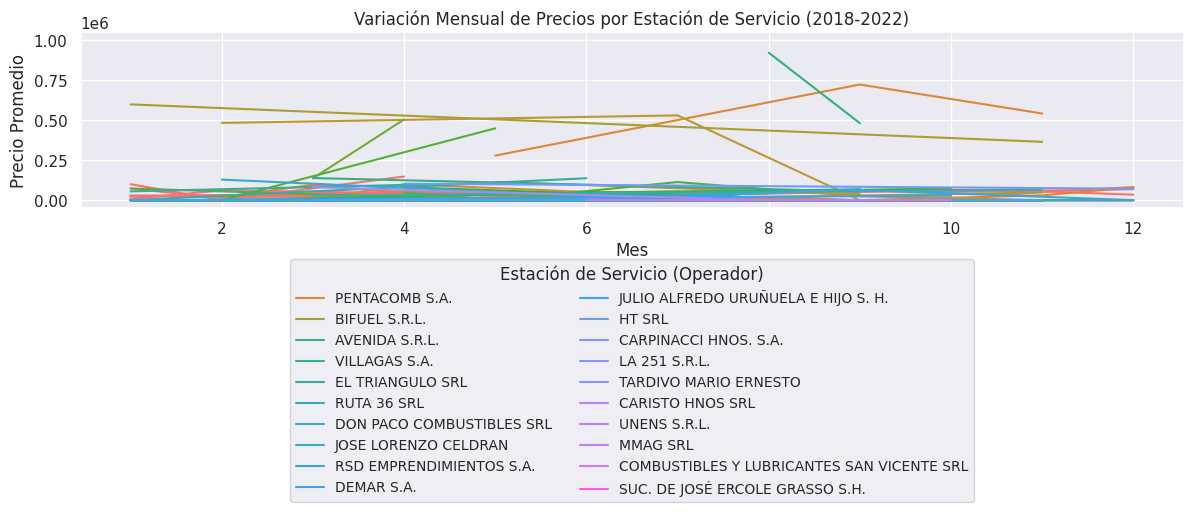

In [121]:
# Unir la tabla de abastecimiento con la tabla de estación de servicio utilizando la columna 'NroInscrip'
df_merged_station = df_Abastecimiento_sample.merge(df_EstacionServicio_sample, on='NroInscrip', how='left')

# Verificar las primeras filas del DataFrame resultante para asegurarse de que la unión se haya realizado correctamente
#print(df_merged_station.head())


# Agrupar por mes, año y estación de servicio, y calcular el precio medio
df_grouped_station = df_merged_station.groupby(['Anio', 'Mes', 'Operador'])['Precio'].mean().reset_index()

# Graficar la variación mensual de precios según la estación de servicio
plt.figure(figsize=(12, 6))
plot=sns.lineplot(data=df_grouped_station, x='Mes', y='Precio', hue='Operador', errorbar=None)
plt.title('Variación Mensual de Precios por Estación de Servicio (2018-2022)')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
#plt.legend(title='Estación de Servicio', bbox_to_anchor=(0.5, 1), loc='upper left')
# Seleccionar las estaciones con los valores más altos de precios promedio (top 20, por ejemplo)
top_stations = df_grouped_station.nlargest(20, 'Precio')['Operador']

# Limitar la leyenda a las estaciones con los valores más altos de precios
handles, labels = plot.get_legend_handles_labels()
top_labels = [label for label in labels if label in top_stations.values]
top_handles = [handle for handle, label in zip(handles, labels) if label in top_stations.values]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Estación de Servicio (Operador)', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.grid(True)
plt.tight_layout()   #asegura que los elementos del gráfico no se solapen
plt.show()

Interpretación: Este gráfico muestra la tendencia de los precios de los combustibles a lo largo del tiempo según el operador. Se puede observar cómo los precios fluctúan mensualmente y si hay patrones estacionales o tendencias a largo plazo.

2. Correlación entre precios y volúmenes de venta
Para esto, usaremos un gráfico de dispersión (scatter plot) que nos ayudará a visualizar la relación entre los precios y los volúmenes de venta, diferenciando por la estación de servicio y la marca de combustible.

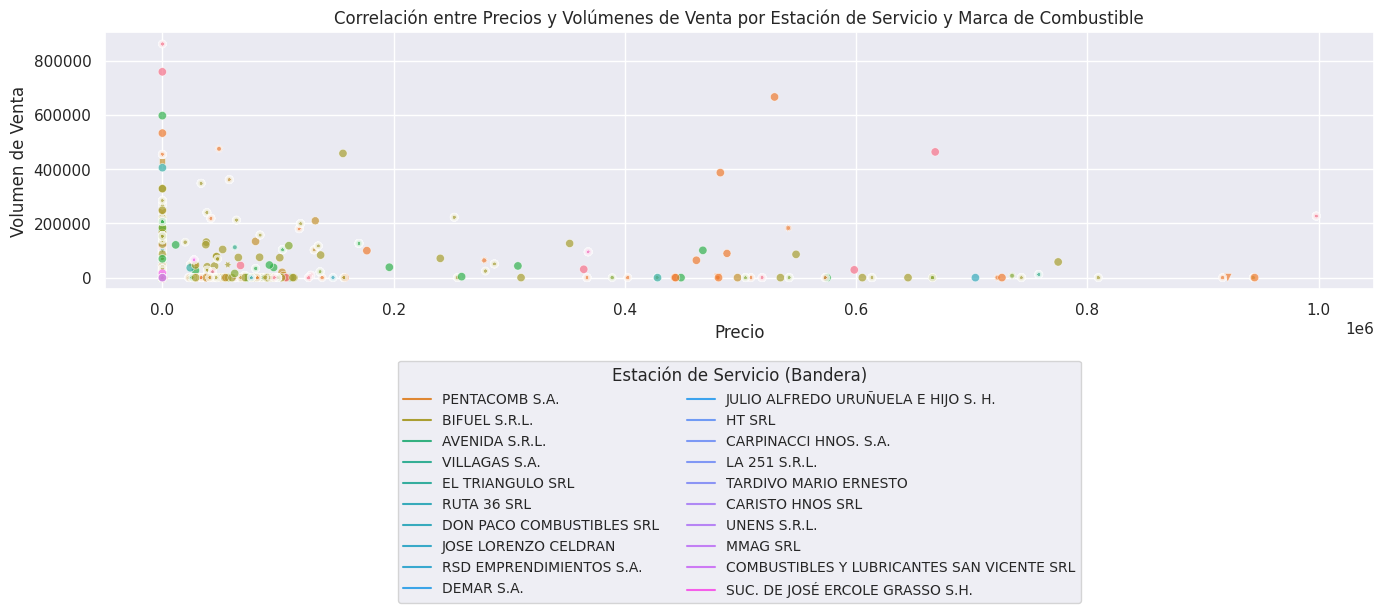

In [122]:
# Fusionar df_merged_station(df_Abastecimiento con df_EstacionServicio) con df_Combustible
df_merged_station_combustible = df_merged_station.merge(df_Combustible_sample, on='CombustibleID', how='left')

# Crear el gráfico de dispersión
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_merged_station_combustible, x='Precio', y='Volumen', hue='Bandera', style='Operador', alpha=0.7)
plt.title('Correlación entre Precios y Volúmenes de Venta por Estación de Servicio y Marca de Combustible')
plt.xlabel('Precio')
plt.ylabel('Volumen de Venta')
# Limitar la leyenda a las estaciones con los valores más altos de precios
handles, labels = plot.get_legend_handles_labels()
top_labels = [label for label in labels if label in top_stations.values]
top_handles = [handle for handle, label in zip(handles, labels) if label in top_stations.values]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Estación de Servicio (Bandera)', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.tight_layout()
plt.show()

Interpretación: Este gráfico ayuda a identificar si hay una correlación significativa entre los precios y los volúmenes de venta. La diferenciación por estación de servicio y tipo de combustible puede mostrar si ciertas estaciones o combustibles tienen un comportamiento distinto.

3. Distribución geoespacial de estaciones de servicio
Para visualizar la distribución geográfica de las estaciones de servicio, usaremos un gráfico de dispersión geoespacial.

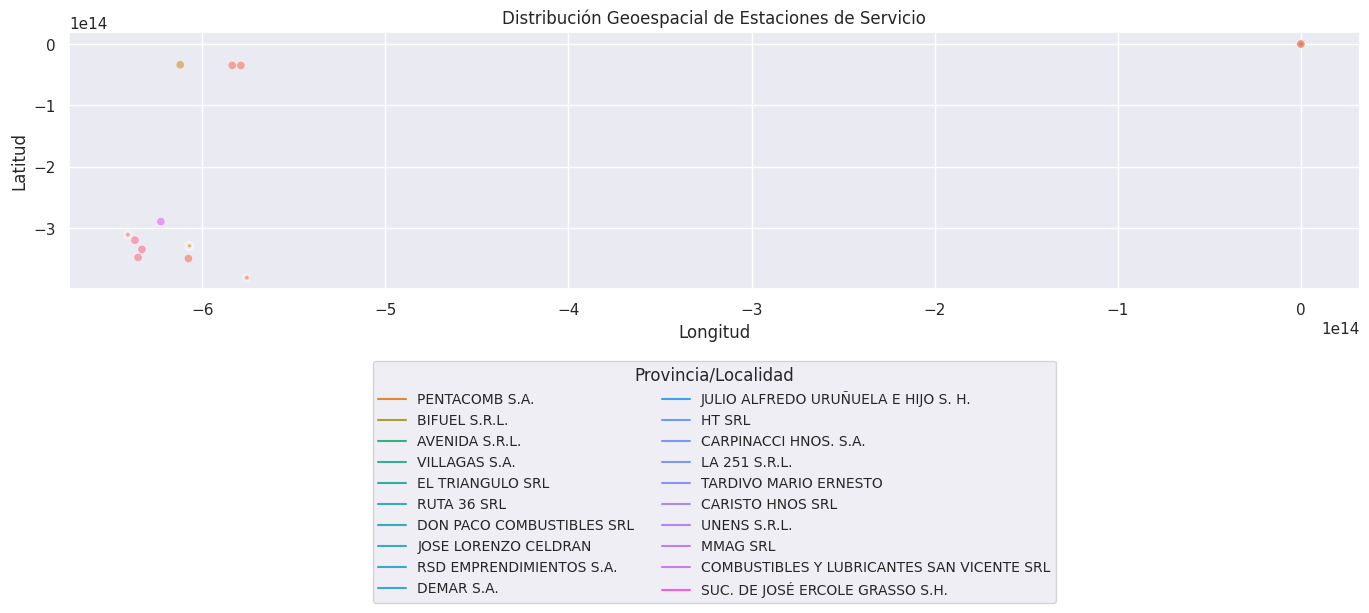

In [192]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_Ubicacion_sample, x='Longitud', y='Latitud', hue='Provincia', style='Localidad', alpha=0.6)
plt.title('Distribución Geoespacial de Estaciones de Servicio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Limitar la leyenda a las estaciones con los valores más altos de precios
#handles, labels = plot.get_legend_handles_labels()
#top_labels = [label for label in labels if label in top_stations.values]
#top_handles = [handle for handle, label in zip(handles, labels) if label in top_stations.values]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Provincia/Localidad', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.tight_layout()
plt.grid(True)
plt.show()
#Puede funcionar este grafico limpiando la Latitud y la Longitud

Interpretación: Este gráfico muestra la distribución de las estaciones de servicio en diferentes localidades y provincias. Es útil para identificar concentraciones de estaciones y su relación con áreas geográficas específicas.

<ipython-input-188-e5e9287cccef>:60: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


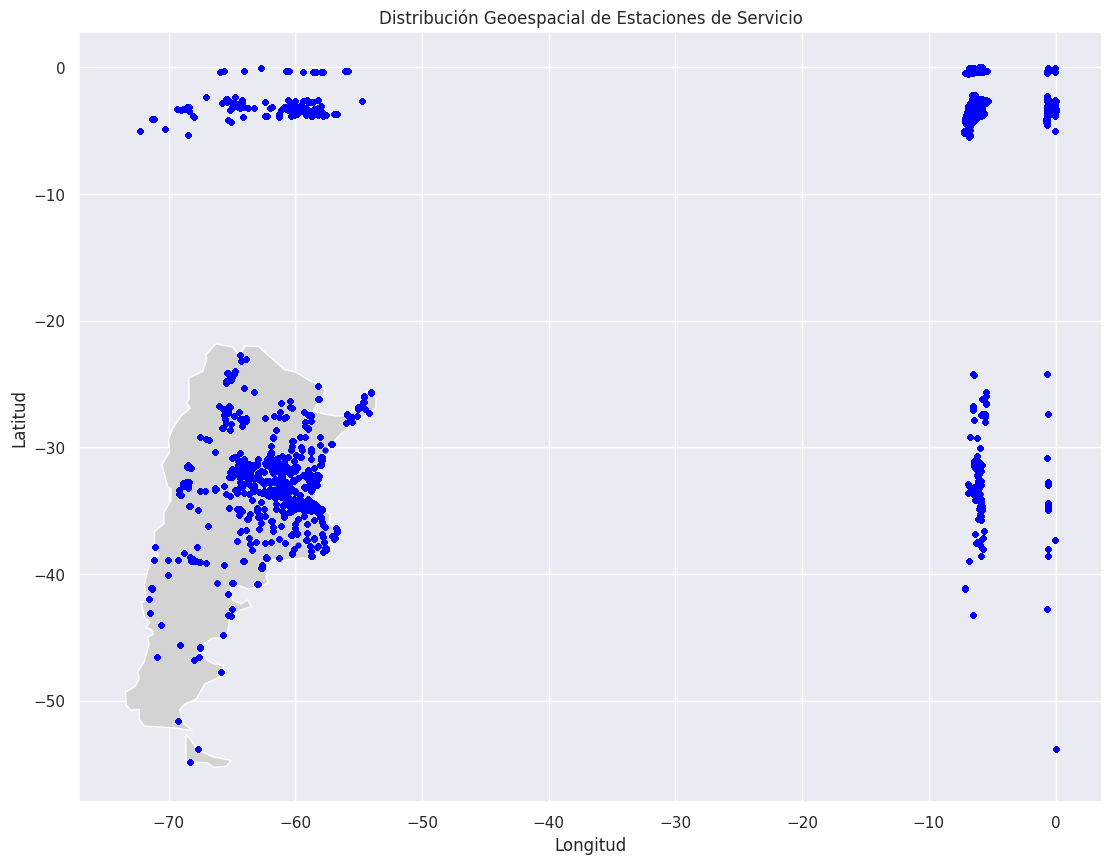

In [188]:
# Fusionar df_EstacionServicio con df_Ubicacion para obtener las coordenadas
df_merged_location = df_EstacionServicio.merge(df_Ubicacion, on='Id_direccion', how='left')

# Mostrar algunas filas para inspeccionar los datos originales
#print("Datos originales:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Reemplazar comas por puntos en las columnas de 'Longitud' y 'Latitud'
df_merged_location['Longitud'] = df_merged_location['Longitud'].str.replace(',', '.')
df_merged_location['Latitud'] = df_merged_location['Latitud'].str.replace(',', '.')

# Mostrar algunas filas después de reemplazar comas
#print("Después de reemplazar comas:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Convertir las columnas de 'Longitud' y 'Latitud' a tipo float
df_merged_location['Longitud'] = pd.to_numeric(df_merged_location['Longitud'], errors='coerce')
df_merged_location['Latitud'] = pd.to_numeric(df_merged_location['Latitud'], errors='coerce')

# Mostrar algunas filas después de la conversión
#print("Después de la conversión a numérico:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Verificar si las coordenadas parecen estar fuera de escala y ajustar si es necesario
# Asumiendo que las coordenadas están en el rango -18000000 a 18000000 y -9000000 a 9000000
# Dividimos por 1000000 para ajustar las coordenadas
df_merged_location['Longitud'] = df_merged_location['Longitud'] / 1000000
df_merged_location['Latitud'] = df_merged_location['Latitud'] / 1000000


# Mostrar algunas filas después de ajustar las coordenadas
#print("Después de ajustar las coordenadas:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Eliminar filas con valores vacíos o inválidos en 'Longitud' y 'Latitud'
df_merged_location = df_merged_location.dropna(subset=['Longitud', 'Latitud'])

# Verificar que las coordenadas estén en el rango geográfico esperado
df_merged_location = df_merged_location[
    (df_merged_location['Longitud'] >= -180) & (df_merged_location['Longitud'] <= 0) &
    (df_merged_location['Latitud'] >= -90) & (df_merged_location['Latitud'] <= 0)
]

# Mostrar estadísticas de las coordenadas
#print("Estadísticas de coordenadas después del filtrado:")
#print(df_merged_location[['Longitud', 'Latitud']].describe())

# Mostrar la cantidad de filas restantes después del filtrado
#print(f"Filas restantes después del filtrado: {len(df_merged_location)}")

# Verificar si hay alguna fila restante
#if len(df_merged_location) > 0:

# Crear un GeoDataFrame a partir de df_merged_location
gdf = gpd.GeoDataFrame(df_merged_location,
        geometry=gpd.points_from_xy(df_merged_location.Longitud, df_merged_location.Latitud)
    )

# Cargar el mapa base
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Verificar si el mapa base se ha cargado correctamente
#print("Mapa base cargado: ")
#print(world.head())

# Filtrar el mapa base para el país de interés (por ejemplo, 'Argentina')
country_name = 'Argentina'
world = world[world.name == country_name]

# Verificar si el país se ha filtrado correctamente
#print(f"Mapa base filtrado para {country_name}: ")
#print(world)

# Graficar la distribución geoespacial
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

# Plotear el mapa base
world.plot(ax=ax, color='lightgrey')

# Plotear las estaciones de servicio
gdf.plot(ax=ax, color='blue', markersize=10, alpha=0.6)

plt.title('Distribución Geoespacial de Estaciones de Servicio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Interpretación: Este gráfico muestra la distribución de las estaciones de servicio en diferentes localidades y provincias de Argentina. Es útil para identificar concentraciones de estaciones y su relación con áreas geográficas específicas.

* Evaluar los factores que influyen en los precios y volúmenes de venta en estaciones de servicio en diferentes localidades y provincias, para identificar patrones de comportamiento en diferentes regiones, y proporcionar información valiosa para los actores del sector y los responsables de la toma de decisiones.  


4. Factores que influyen en precios y volúmenes de venta en diferentes localidades y provincias
Para esto, usaremos gráficos de caja (box plots) para comparar los precios y volúmenes de venta en diferentes localidades y provincias.

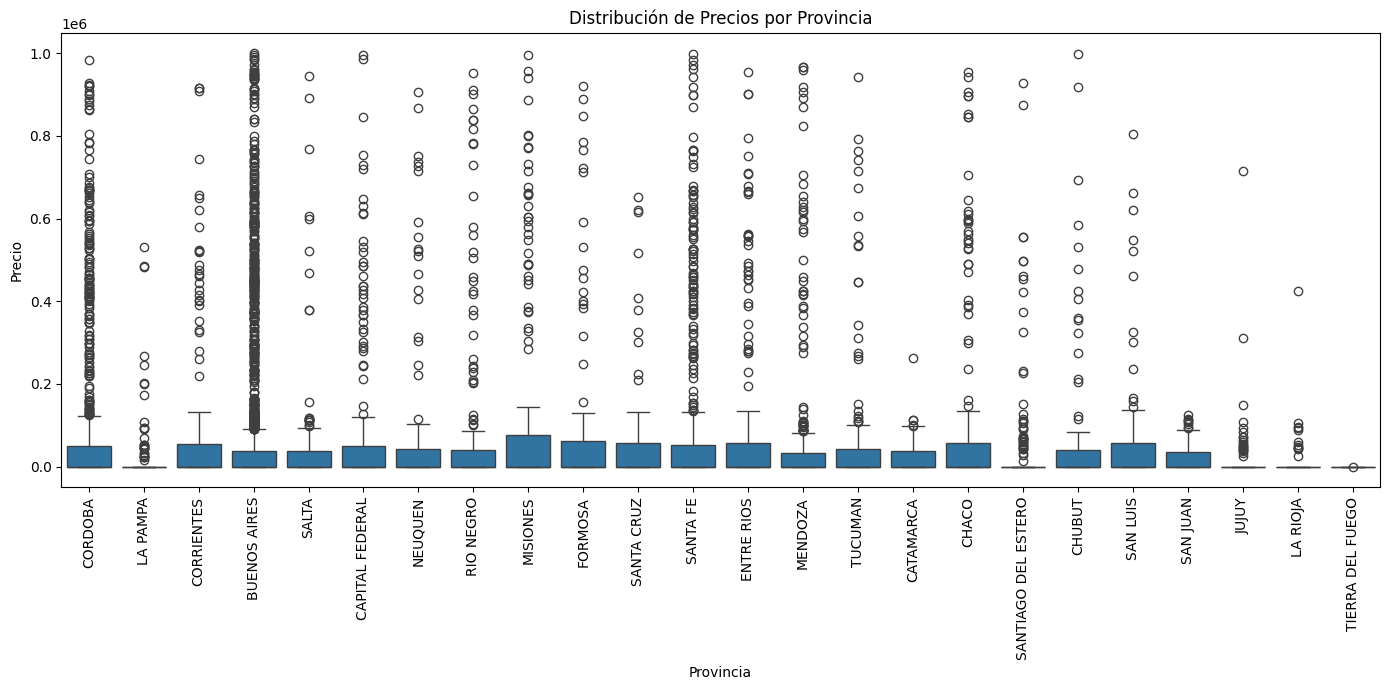

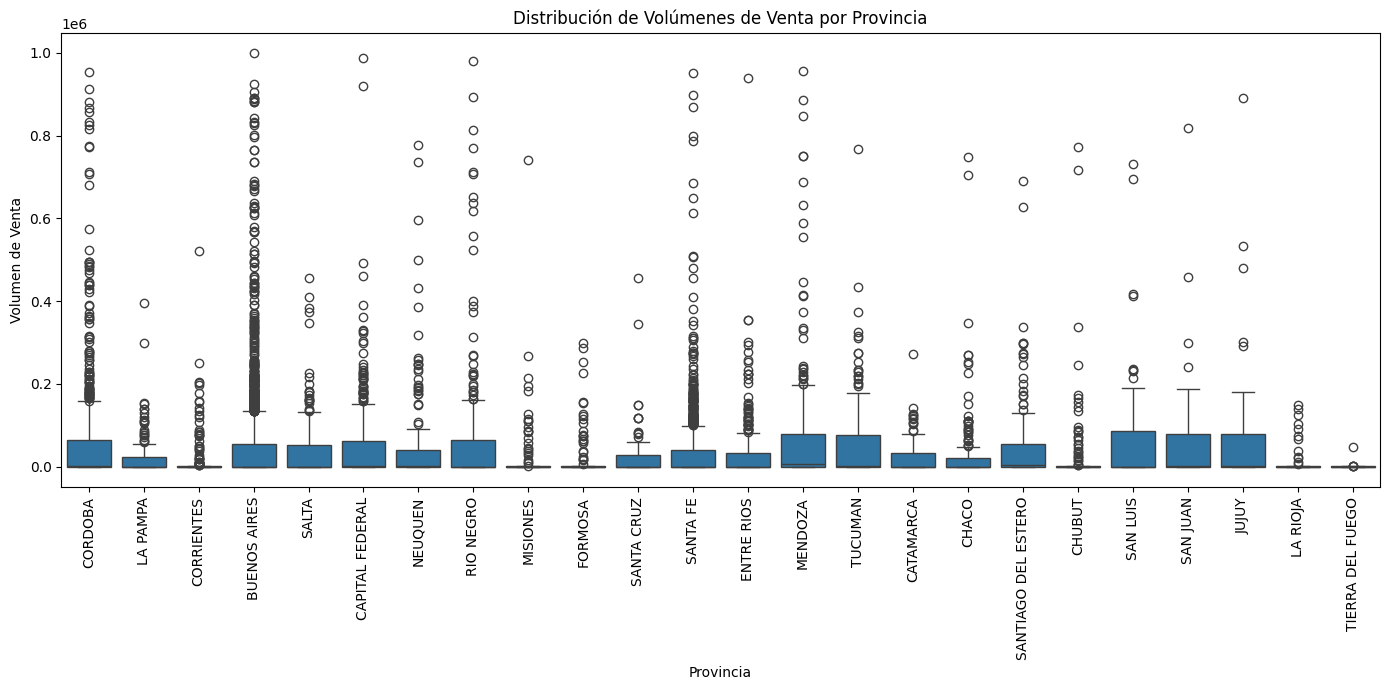

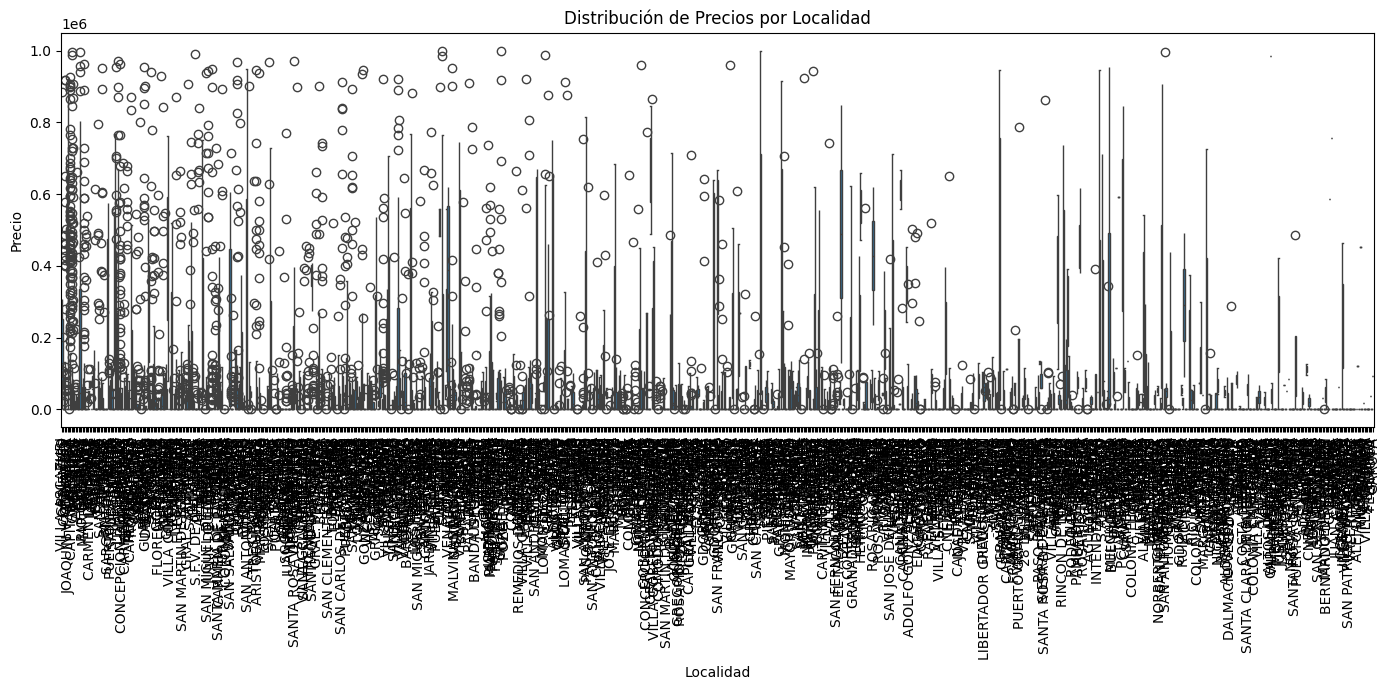

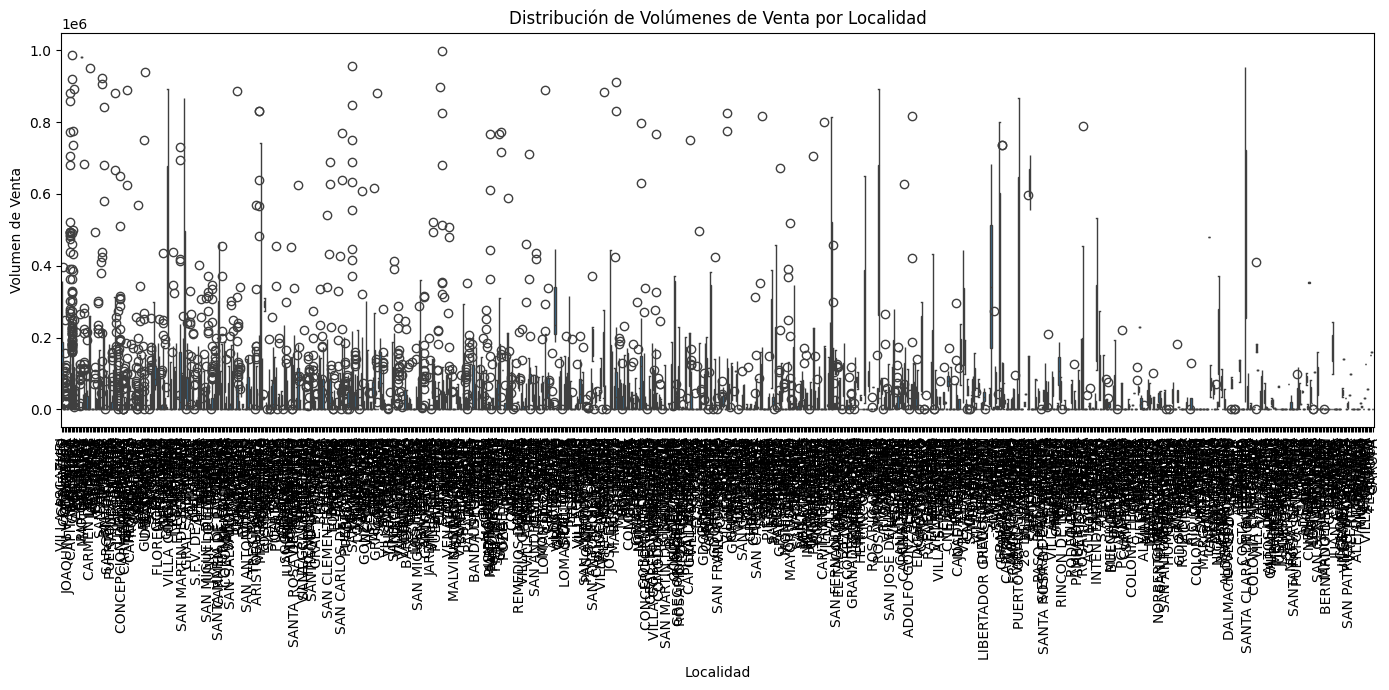

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df_EstacionServicio = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/EstacionServicio.csv', encoding='latin1', delimiter=';')
df_Ubicacion = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Ubicacion.csv', encoding='latin1', delimiter=';')
df_Abastecimiento = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Abastecimiento.csv', encoding='latin1', delimiter=';')

# Convertir la columna 'Fecha' a tipo fecha en df_Abastecimiento
df_Abastecimiento['Fecha'] = pd.to_datetime(df_Abastecimiento['Fecha'], format='%Y/%m')

# Seleccionar una muestra representativa de 10,000 registros
df_Abastecimiento_sample = df_Abastecimiento.sample(n=10000, random_state=1)

# Renombrar columnas con (FK) y (PK) en su nombre
df_Abastecimiento_sample.rename(columns={
    'NroInscrip_IdCombust (PK)': 'NroInscrip_IdCombust',
    'NroInscrip (FK)': 'NroInscrip',
    'CombustibleID (FK)': 'CombustibleID'
}, inplace=True)

df_EstacionServicio.rename(columns={
    'NroInscrip (PK)': 'NroInscrip',
    'Id_direccion (FK)': 'Id_direccion'
}, inplace=True)

df_Ubicacion.rename(columns={
    'Id_direccion (PK)': 'Id_direccion'
}, inplace=True)

# Fusionar df_Abastecimiento con df_EstacionServicio para obtener información de estaciones de servicio
df_merged = df_Abastecimiento_sample.merge(df_EstacionServicio, on='NroInscrip', how='left')

# Fusionar con df_Ubicacion para obtener información de ubicaciones
df_merged = df_merged.merge(df_Ubicacion, on='Id_direccion', how='left')

# Eliminar filas con valores vacíos o inválidos en 'Longitud' y 'Latitud'
df_merged = df_merged.dropna(subset=['Longitud', 'Latitud'])

# Convertir las coordenadas de 'Longitud' y 'Latitud' a tipo float
df_merged['Longitud'] = df_merged['Longitud'].str.replace(',', '.').astype(float)
df_merged['Latitud'] = df_merged['Latitud'].str.replace(',', '.').astype(float)

# Ajustar las coordenadas dividiendo por 1,000,000 para convertir a rangos válidos
df_merged['Longitud'] = df_merged['Longitud'] / 1000000
df_merged['Latitud'] = df_merged['Latitud'] / 1000000

# Invertir los valores de latitud (hemisferio sur)
df_merged['Latitud'] = df_merged['Latitud'] * -1

# Verificar que las coordenadas estén en el rango geográfico esperado
df_merged = df_merged[
    (df_merged['Longitud'] >= -180) & (df_merged['Longitud'] <= 180) &
    (df_merged['Latitud'] >= -90) & (df_merged['Latitud'] <= 90)
]

# Crear gráficos de caja para comparar los precios en diferentes provincias
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_merged, x='Provincia', y='Precio')
plt.title('Distribución de Precios por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crear gráficos de caja para comparar los volúmenes de venta en diferentes provincias
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_merged, x='Provincia', y='Volumen')
plt.title('Distribución de Volúmenes de Venta por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Volumen de Venta')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crear gráficos de caja para comparar los precios en diferentes localidades
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_merged, x='Localidad', y='Precio')
plt.title('Distribución de Precios por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crear gráficos de caja para comparar los volúmenes de venta en diferentes localidades
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_merged, x='Localidad', y='Volumen')
plt.title('Distribución de Volúmenes de Venta por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Volumen de Venta')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Interpretación: Estos gráficos comparan los precios y volúmenes de venta entre las provincias. Se pueden identificar diferencias significativas que indiquen cómo los factores regionales influyen en el mercado de combustibles.

Queda claro que no es conveniente el gráfico para la localidad, ya que son demasiadas. Otorgando más información el gráfico por provincias.

* Analizar la variación mensual y anual, desde el año 2018 hasta el 2022, de precios de los combustibles, permitiendo una evaluación a lo largo del tiempo y la identificación de tendencias a largo plazo.

5. Variación mensual y anual de precios de los combustibles
Para analizar la variación mensual y anual de los precios, utilizamos gráficos de líneas para cada tipo de combustible.

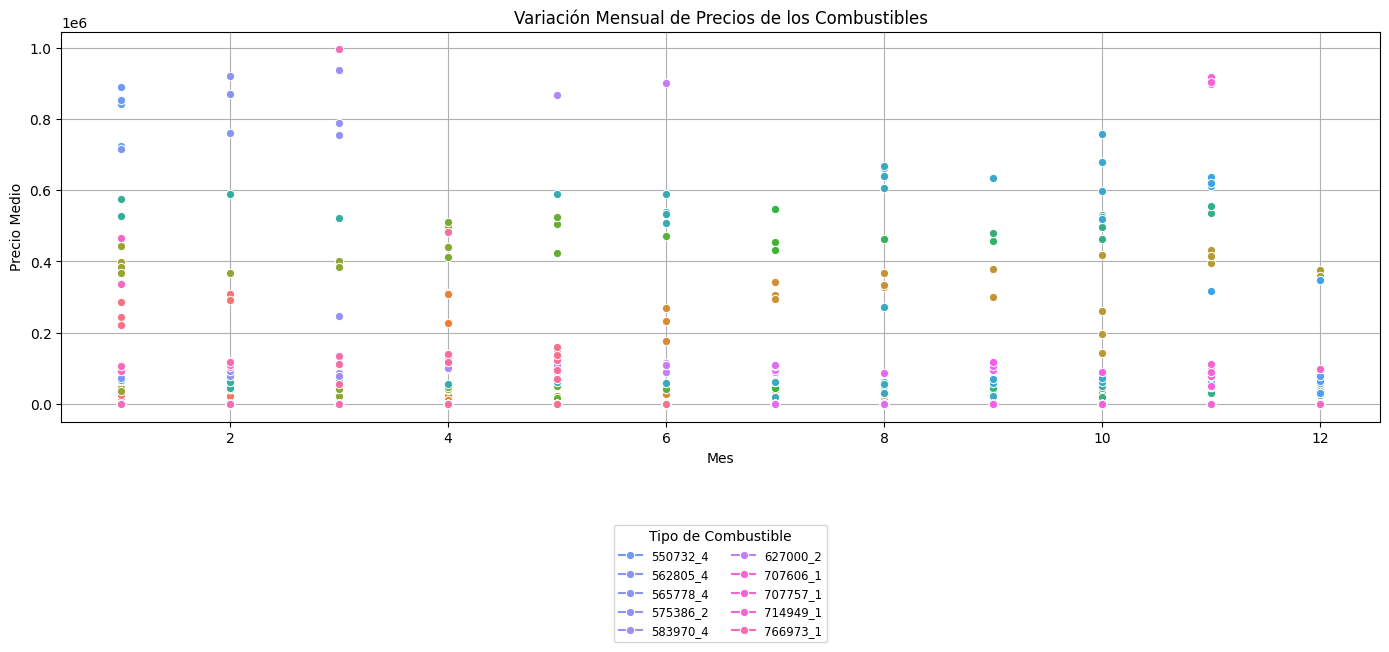

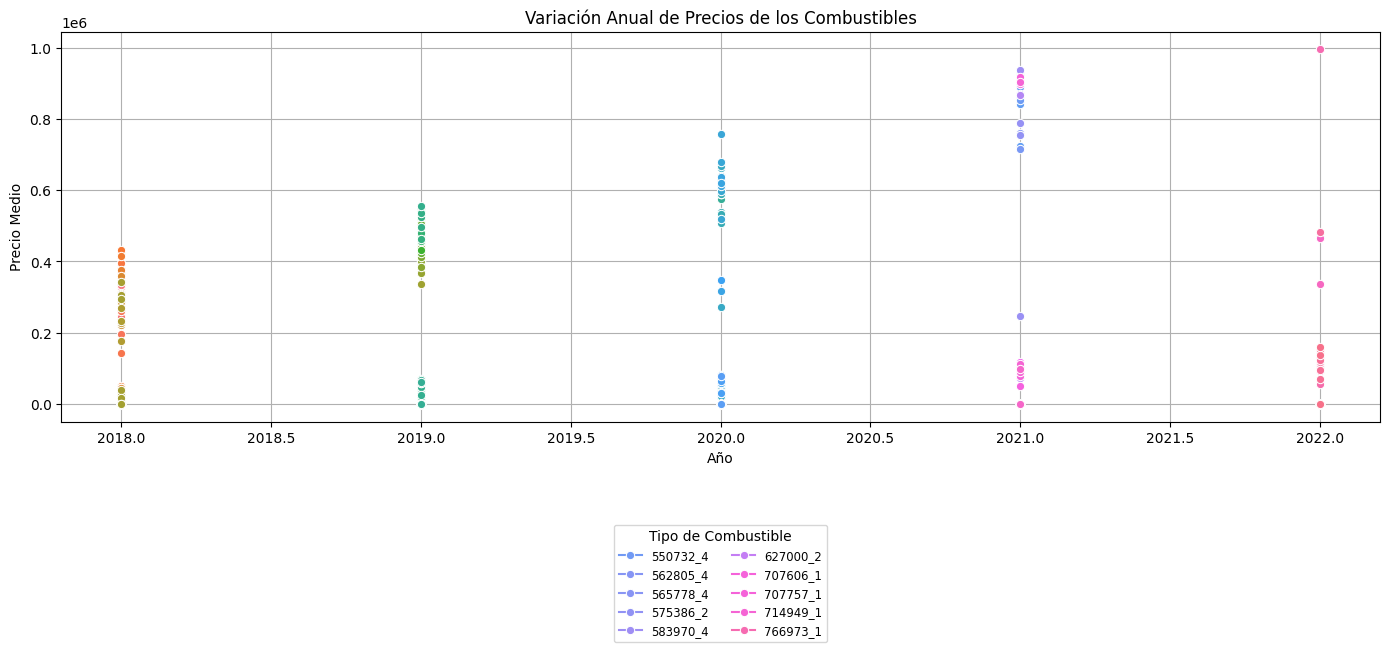

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df_Combustible = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Combustible.csv', encoding='latin1', delimiter=';')
df_Abastecimiento = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Abastecimiento.csv', encoding='latin1', delimiter=';')

# Convertir la columna 'Fecha' a tipo fecha en df_Abastecimiento
df_Abastecimiento['Fecha'] = pd.to_datetime(df_Abastecimiento['Fecha'], format='%Y/%m')

# Seleccionar una muestra representativa de 10,000 registros
df_Abastecimiento_sample = df_Abastecimiento.sample(n=1000, random_state=1)
df_Combustible_sample = df_Combustible.sample(n=1000, random_state=1)
# Renombrar columnas con (FK) y (PK) en su nombre
df_Abastecimiento_sample.rename(columns={
    'NroInscrip_IdCombust (PK)': 'NroInscrip_IdCombust',
    'NroInscrip (FK)': 'NroInscrip',
    'CombustibleID (FK)': 'CombustibleID'
}, inplace=True)

df_Combustible_sample.rename(columns={
    'CombustibleID (PK)': 'CombustibleID'
}, inplace=True)

# Fusionar df_Abastecimiento con df_Combustibles para obtener información de combustibles
df_merged = df_Abastecimiento_sample.merge(df_Combustible_sample, on='CombustibleID', how='left')

# Añadir columnas de año y mes para el análisis
df_merged['Año'] = df_merged['Fecha'].dt.year
df_merged['Mes'] = df_merged['Fecha'].dt.month

# Calcular el precio medio mensual para cada tipo de combustible
precio_medio_mensual = df_merged.groupby(['Año', 'Mes', 'CombustibleID'])['Precio'].mean().reset_index()

# Calcular el precio medio anual para cada tipo de combustible
precio_medio_anual = df_merged.groupby(['Año', 'CombustibleID'])['Precio'].mean().reset_index()

# Graficar la variación mensual de precios para cada tipo de combustible
plt.figure(figsize=(14, 7))
plot=sns.lineplot(data=precio_medio_mensual, x='Mes', y='Precio', hue='CombustibleID', marker='o')
plt.title('Variación Mensual de Precios de los Combustibles')
plt.xlabel('Mes')
plt.ylabel('Precio Medio')
# Seleccionar los tipos de combustibles con los valores más altos de precios
top_combustibles = precio_medio_mensual.groupby('CombustibleID')['Precio'].mean().nlargest(10).index
# Limitar la leyenda a los tipos de combustibles con los valores más altos de precios
handles, labels = plot.get_legend_handles_labels()
top_labels = [label for label in labels if label in top_combustibles]
top_handles = [handle for handle, label in zip(handles, labels) if label in top_combustibles]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Tipo de Combustible', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar la variación anual de precios para cada tipo de combustible
plt.figure(figsize=(14, 7))
plot=sns.lineplot(data=precio_medio_anual, x='Año', y='Precio', hue='CombustibleID', marker='o')
plt.title('Variación Anual de Precios de los Combustibles')
plt.xlabel('Año')
plt.ylabel('Precio Medio')
# Seleccionar los tipos de combustibles con los valores más altos de precios
top_combustibles = precio_medio_anual.groupby('CombustibleID')['Precio'].mean().nlargest(10).index
# Limitar la leyenda a los tipos de combustibles con los valores más altos de precios
handles, labels = plot.get_legend_handles_labels()
top_labels = [label for label in labels if label in top_combustibles]
top_handles = [handle for handle, label in zip(handles, labels) if label in top_combustibles]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Tipo de Combustible', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretación: Este gráfico muestra la variación de precios a lo largo del tiempo (mensual y anual ) para cada tipo de combustible, permitiendo identificar tendencias y cambios significativos que pueden ser útiles para la planificación y toma de decisiones.